In [28]:
import numpy as np
import PIL
from PIL import Image
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


img1=PIL.Image.open("C:/Users/amans/Desktop/iris.jpg")
imgray1=np.array(img1)
aa1,bb1,cc1 = imgray1.shape
x1 = imgray1.reshape(-1, imgray1.shape[-1])

n1,k1 = x1.shape


img2=PIL.Image.open("C:/Users/amans/Desktop/493546.jpg")
imgray2=np.array(img2)
aa2,bb2,cc2 = imgray2.shape
x2 = imgray2.reshape(-1, imgray2.shape[-1])

n2,k2 = x2.shape

In [6]:
def IMC1(x,Nc):
    n,k = x.shape
    nor = np.zeros((n,k))
#     beta = np.ones((Nc))

    for i in range(n):
            nor[i,:] = (x[i,:]-np.min(x,axis = 0))/(np.max(x,axis = 0)-np.min(x,axis = 0))

    U = nor
    m = np.zeros((Nc))  # no. of data points in cluster 
    t = np.zeros((Nc+1) , dtype = int)  # no. of left out data points
    t[0] = n
    delta = np.zeros((Nc))
    P = np.zeros((n,Nc))
    cc_norm = np.zeros((Nc,k))
    sl = np.zeros((n,Nc+1) , dtype = int)  # row indices of left out data point
    SL = np.zeros((n,Nc) , dtype = int)  # row indices of data points in cluster
    sl[:,0] = range(n)  
    
    idx = np.zeros((n) , dtype = int)
    for v in range(Nc):
        if t[v] != 0:
            d = 0
            for j in range(t[v]):
                    if np.sum(x[sl[j,v],:]) != 0:
                        d += np.min(x[sl[j,v],:])/np.sum(x[sl[j,v],:])
            delta[v] = (0.5/t[v])*d

            for r in range(t[v]):
                    P[r,v] = 0
                    Q = np.ones((k,k))
                    for j in range(t[v]):
                        P[r, v] += np.exp(-np.sum((nor[r, :] - nor[j, :])* Q * np.transpose(nor[r, :] - nor[j, :])) / (delta[v] ** 2))

            zmax = np.argmax(P[:, v])

            cc_norm[v,:] = nor[int(zmax),:]

            u = np.empty((0,3))
            for r in range(t[v]):
                if np.sum((nor[r, :] - cc_norm[v, :]) * Q *np.transpose(nor[r, :] - cc_norm[v, :])) <= delta[v]:
                    m[v] += 1
                    SL[int(m[v]-1),v] = sl[r,v]
                    idx[sl[r,v]] = int(v)

                else:
                    t[v+1] += 1
                    sl[t[v+1]-1,v+1] = sl[r,v]
                    u = np.vstack((u,nor[r,:]))

            nor = u 
    # Now distributing left out points into already formed clusters        

    D = np.zeros((Nc,t[Nc]))
    zmin = np.zeros((t[Nc]))

    if t[v+1] != 0:
            for r in range(t[Nc]):
                for v in range(Nc):
                    D[v,r] = np.sum((nor[r, :] - cc_norm[v,:])* Q * np.transpose(nor[r, :] - cc_norm[v,:]))

            for i in range(t[Nc]):
                zmin[i] = np.argmin(D[:,i])

            for r in range(t[Nc]):
                v = int(zmin[r])
                m[v] += 1
                SL[int(m[v]-1),v] = sl[r,Nc]
                idx[sl[r,Nc]] = int(v)
    
    return idx,m,cc_norm,delta,U


In [7]:
def IMC2(x,Nc):
    n,k = x.shape
    nor = np.zeros((n,k))
    alpha = Nc/(Nc+1)

    for i in range(n):
            nor[i,:] = (x[i,:]-np.min(x,axis = 0))/(np.max(x,axis = 0)-np.min(x,axis = 0))

    U = nor
    m = np.zeros((Nc))  # no. of data points in cluster 
    t = np.zeros((Nc+1) , dtype = int)  # no. of left out data points
    t[0] = n
    delta = np.zeros((Nc))
    P = np.zeros((n,Nc))
    cc_norm = np.zeros((Nc,k))
    sl = np.zeros((n,Nc+1) , dtype = int)  # row indices of left out data point
    SL = np.zeros((n,Nc) , dtype = int)  # row indices of data points in cluster
    sl[:,0] = range(n)  
    
    idx = np.zeros((n) , dtype = int)
    for v in range(Nc):
        if t[v] != 0:
            d = 0
            for j in range(t[v]):
                    if np.sum(x[sl[j,v],:]) != 0:
                        d += np.min(x[sl[j,v],:])/np.sum(x[sl[j,v],:])
            delta[v] = (0.5/t[v])*d*alpha

            for r in range(t[v]):
                    P[r,v] = 0
                    Q = np.ones((k,k))
                    for j in range(t[v]):
                        P[r, v] += np.exp(-np.sum((nor[r, :] - nor[j, :])* Q * np.transpose(nor[r, :] - nor[j, :])) / (delta[v] ** 2))

            zmax = np.argmax(P[:, v])

            cc_norm[v,:] = nor[int(zmax),:]

            u = np.empty((0,3))
            for r in range(t[v]):
                if np.sum((nor[r, :] - cc_norm[v, :]) * Q *np.transpose(nor[r, :] - cc_norm[v, :])) <= delta[v]:
                    m[v] += 1
                    SL[int(m[v]-1),v] = sl[r,v]
                    idx[sl[r,v]] = int(v)

                else:
                    t[v+1] += 1
                    sl[t[v+1]-1,v+1] = sl[r,v]
                    u = np.vstack((u,nor[r,:]))

            nor = u 
    # Now distributing left out points into already formed clusters        

    D = np.zeros((Nc,t[Nc]))
    zmin = np.zeros((t[Nc]))

    if t[v+1] != 0:
            for r in range(t[Nc]):
                for v in range(Nc):
                    D[v,r] = np.sum((nor[r, :] - cc_norm[v,:])* Q * np.transpose(nor[r, :] - cc_norm[v,:]))

            for i in range(t[Nc]):
                zmin[i] = np.argmin(D[:,i])

            for r in range(t[Nc]):
                v = int(zmin[r])
                m[v] += 1
                SL[int(m[v]-1),v] = sl[r,Nc]
                idx[sl[r,Nc]] = int(v)
    
    return idx,m,cc_norm,delta,U

In [8]:
def SOC(x,Nc,beta):
    n,k = x.shape
    nor = np.zeros((n,k))

    for i in range(n):
            nor[i,:] = (x[i,:]-np.min(x,axis = 0))/(np.max(x,axis = 0)-np.min(x,axis = 0))

    U = nor
    m = np.zeros((Nc))  # no. of data points in cluster 
    t = np.zeros((Nc+1) , dtype = int)  # no. of left out data points
    t[0] = n
    delta = np.zeros((Nc))
    P = np.zeros((n,Nc))
    cc_norm = np.zeros((Nc,k))
    sl = np.zeros((n,Nc+1) , dtype = int)  # row indices of left out data point
    SL = np.zeros((n,Nc) , dtype = int)  # row indices of data points in cluster
    sl[:,0] = range(n)  
    c_disp = np.ones((n,k,Nc)) * 255
    idx = np.zeros((n) , dtype = int) # Index of which data point is in which cluster

    for v in range(Nc):
        if t[v] != 0:
            d = 0
            for j in range(t[v]):
                    if np.sum(x[sl[j,v],:]) != 0:
                        d += np.min(x[sl[j,v],:])/np.sum(x[sl[j,v],:])
            delta[v] = (0.5/t[v])*d*beta[v]
            
           

            for r in range(t[v]):
                    P[r,v] = 0
                    Q = np.ones((k,k))
                    for j in range(t[v]):
                        P[r, v] += np.exp(-np.sum((nor[r, :] - nor[j, :])* Q * np.transpose(nor[r, :] - nor[j, :])) / (delta[v] ** 2))

            zmax = np.argmax(P[:, v])

            cc_norm[v,:] = nor[int(zmax),:]

            u = np.empty((0,3))
            for r in range(t[v]):
                if np.sum((nor[r, :] - cc_norm[v, :]) * Q *np.transpose(nor[r, :] - cc_norm[v, :])) <= delta[v]:
                    m[v] += 1
                    SL[int(m[v]-1),v] = sl[r,v]
                    idx[sl[r,v]] = int(v)
                    c_disp[sl[r,v],:,v] = x[sl[r,v],:];         


                else:
                    t[v+1] += 1
                    sl[t[v+1]-1,v+1] = sl[r,v]
                    u = np.vstack((u,nor[r,:]))


            nor = u 
    # Now distributing left out points into already formed clusters        

    D = np.zeros((Nc,t[Nc]))
    zmin = np.zeros((t[Nc]))

    if t[v+1] != 0:
            for r in range(t[Nc]):
                for v in range(Nc):
                    D[v,r] = np.sum((nor[r, :] - cc_norm[v,:])* Q * np.transpose(nor[r, :] - cc_norm[v,:]))

            for i in range(t[Nc]):
                zmin[i] = np.argmin(D[:,i])

            for r in range(t[Nc]):
                v = int(zmin[r])
                m[v] += 1
                SL[int(m[v]-1),v] = sl[r,Nc]
                idx[sl[r,Nc]] = int(v)
                c_disp[sl[r,Nc],:,v] = x[sl[r,Nc],:]
    
    return idx,m,cc_norm,delta,U,c_disp

In [9]:
import numpy as np
from sklearn.metrics import silhouette_samples

def silhouette_index(data, cluster_indices):
   
    silhouette_values = silhouette_samples(data, cluster_indices)
    return silhouette_values

In [10]:
def slht(s,idx,n,m,nk):
    
    S_const = np.zeros((nk))
    S = np.zeros((nk))
    for r in range(n):
        S_const[int(idx[r])] += s[r]
        
    for j in range(nk):
        S[j] = (1/(m[j]+1e-10))*S_const[j]
        
    GS = 1/nk*np.sum(S)
    
    return S,GS

In [11]:
def membership_matrix(X, cluster_centers, fuzziness=2):

    n_clusters = len(cluster_centers)
    n_points = len(X)

    membership_matrix = np.zeros((n_points, n_clusters))

    for i in range(n_points):
        for k in range(n_clusters):
            distances = np.linalg.norm(X[i] - cluster_centers, axis=1)
            membership_matrix[i, k] = 1.0 / (np.sum((distances / (distances[k]+0.0000001)) ** (2 / (fuzziness - 1)))+0.0000001)

    return membership_matrix

In [12]:
def partition_index(X, cluster_centers, membership_matrix):

    n_clusters = len(cluster_centers)
    n_points = len(X)

    # Calculate partition index components
    pi_components = 0.0
    den = 0

    for i in range(n_points):
        for k in range(n_clusters):
            pi_components += (membership_matrix[i, k])**2 * (np.linalg.norm(X[i] - cluster_centers[k,:]) ** 2)

    for k in range(n_clusters):
        for m in range(n_clusters):
            den += np.linalg.norm(cluster_centers[k,:] - cluster_centers[m,:])

    # Compute partition index
    partition_index = pi_components / (n_points * den)

    return partition_index

In [13]:
def separation_index(data_points, cluster_centers, membership_matrix):
    
    n_samples, n_features = data_points.shape
    n_clusters = len(cluster_centers)

    separation_index = 0.0

    for k in range(n_clusters):
        for m in range(n_clusters):
            if k != m:
                term_sum = 0.0
                for j in range(n_samples):
                    term_sum += (membership_matrix[j, m]**2 * np.linalg.norm(data_points[j, :] - cluster_centers[k,:])**2)
    for k in range(n_clusters):
        for m in range(n_clusters):
            if k!=m:
                separation_index=term_sum/(n_samples*(np.linalg.norm(cluster_centers[k,:] - cluster_centers[m,:])**2))
                                 

    return separation_index

In [14]:
def soc_complete(x,nk):
    
    n,k = x.shape

    flag = 0
    factor = np.ones((10,nk))
    iter =1
    Eta=np.zeros((10))
    GSI = np.zeros((10))
    Iteration = np.array(range(1,11))
    PI = np.ones((10))
    SI=np.ones((10))*10
    C_disp = np.zeros((10,n,k,nk))
    Delta = np.empty((0,nk))

    while iter <= 10:
#         print(iter)
        idx,m,cc_norm,delta,U,c_disp = SOC(x,nk,factor[iter-1,:])
        Delta = np.vstack((Delta,delta))
        C_disp[iter-1,:,:,:] = c_disp
        s = silhouette_index(x, idx)

        S , GS = slht(s,idx,n,m,nk)

        GSI[iter-1] = GS

        mm = membership_matrix(U, cc_norm, fuzziness=2)

        pi = partition_index(U, cc_norm,mm)
        PI[iter-1] = pi

        si=separation_index(U, cc_norm, mm)
        SI[iter-1] = si


        if np.min(m) == 0:
            flag == 1
            break
        for g in range(nk-1):
            for gg in range(g+1,nk):
                if delta[g] == delta[gg]:
                    flag = 1

        if flag == 1:
            break

        polym = lagrange(delta,S)
        polym = np.array(polym).flatten()

        polym[int(nk)-1] -= 1

        r = np.roots(polym)

        sumn = np.zeros(np.size(r))

        for i in range(nk-1):
            for j in range(nk):
                sumn[i] += polym[(int(nk-1))-j]*r[i]**(j)

        mm = np.min(abs(sumn))

        label = np.argmin(abs(sumn))

        dmax = abs(r[label])
        Eta[iter-1] = dmax
        for i in range(nk):
            if iter < 10:
                factor[iter,i] = dmax/delta[i]

        iter += 1
    GSS = max(GSI)
    Pi = min(PI)
    Si = min(SI)
    gsimax = np.argmax((GSI))
    c_disp = C_disp[gsimax,:,:,:]
    
    return GSS,Pi,Si,GSI,PI,SI,Iteration,c_disp


In [29]:
def optimum_clusters(x):
    nc = np.array((range(2,6)))
    GSI = np.zeros((4))
    j = 0
    n,k = x.shape

    for i in nc:

        idx,m,cc_norm,delta,U = IMC1(x,i)

        s = silhouette_index(x,idx)

        S,GS = slht(s,idx,n,m,i)

        GSI[j] = GS

        j += 1


    print(GSI)
    gsimax = np.argmax((GSI))
    print('optimum no of clusters are ', gsimax+2)
    nk = gsimax+2
    return nk

# For 2 Clusters

[0.43222307 0.4111681  0.32961392 0.3097261 ]
optimum no of clusters are  2


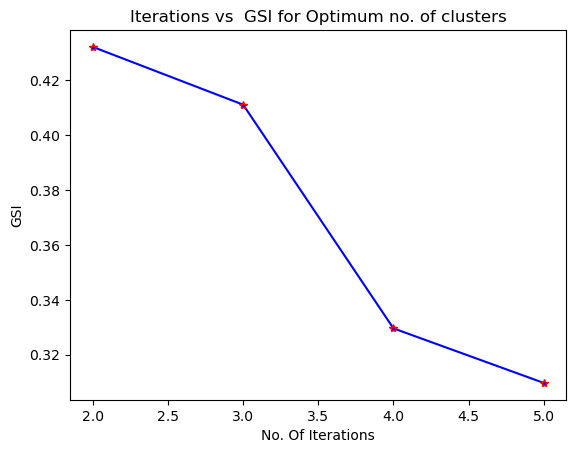

GSI for IMC-1 is 0.43222306623508333
GSI for IMC-2 is 0.421364137036908
GSI for SOC is 0.43262304603452706
PI IMC-1 is 0.3422013179714579
PI IMC-2 is 0.3853832747587534
PI SOC is 0.3422013179714579
SI IMC-1 is 0.9724794591109845
SI IMC-2 is 1.4447699300797987
SI SOC is 0.9724794591109845


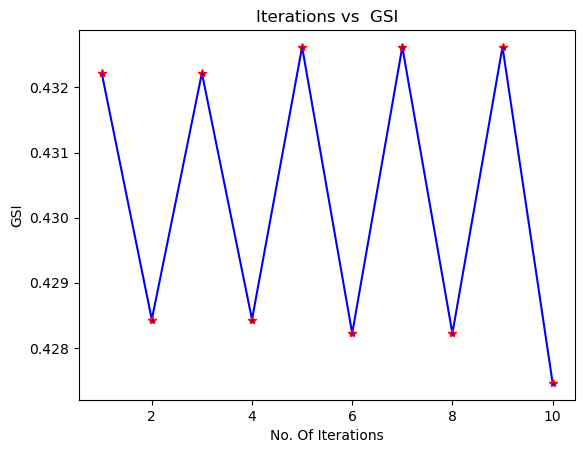

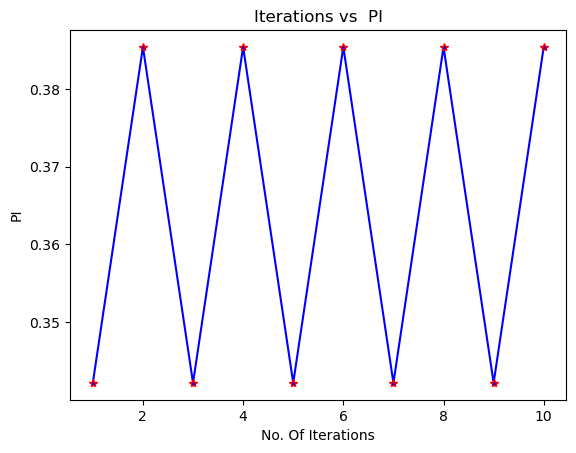

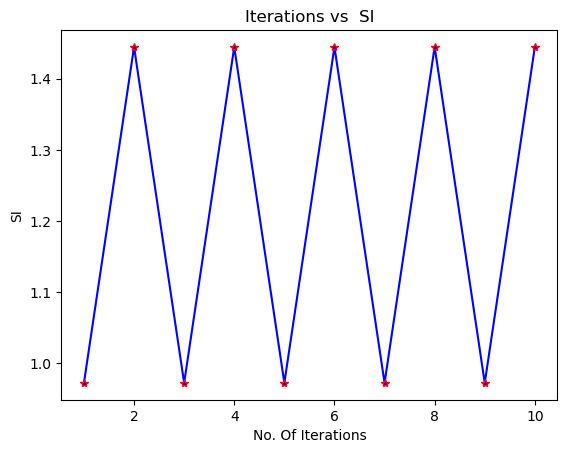

In [35]:
# Optimum no. of Clusters

nc = np.array((range(2,6)))
GSI = np.zeros((4))
j = 0
n,k = x1.shape

for i in nc:
    
    idx,m,cc_norm,delta,U = IMC1(x1,i)

    s = silhouette_index(x1,idx)

    S,GS = slht(s,idx,n,m,i)
    
    GSI[j] = GS
    
    j += 1

    
print(GSI)
gsimax = np.argmax((GSI))
print('optimum no of clusters are ', gsimax+2)
nk = gsimax+2

plt.plot(nc, GSI, marker='*', markeredgecolor = 'r', linestyle='-', color='b', label='Data Points')
plt.xlabel('No. Of Iterations')
plt.ylabel('GSI')
plt.title('Iterations vs  GSI for Optimum no. of clusters')
plt.show()


# Comparing IMC 1, IMC 2,SOC
idx1,m1,cc_norm1,delta1,U1 = IMC1(x1,nk)
idx2,m2,cc_norm2,delta2,U2 = IMC2(x1,nk)

s1 = silhouette_index(x1,idx1)
s2 = silhouette_index(x1,idx2)

S1,GS11 = slht(s1,idx1,n,m1,nk)
S2,GS21 = slht(s2,idx2,n,m2,nk)

mm1 = membership_matrix(U1, cc_norm1, fuzziness=2)
mm2 = membership_matrix(U2, cc_norm2, fuzziness=2)

pi11 = partition_index(U1, cc_norm1,mm1)
pi21 = partition_index(U2, cc_norm2,mm2)

si11=separation_index(U1, cc_norm1, mm1)
si21=separation_index(U2, cc_norm2, mm2)

GSS1,PIS1,SIS1,GSI1,PI1,SI1,Iteration1,c_disp1 = soc_complete(x1,nk)

print('GSI for IMC-1 is', GS11)
print('GSI for IMC-2 is',GS21)
print('GSI for SOC is',GSS1)
print('PI IMC-1 is',pi11)
print('PI IMC-2 is',pi21)
print('PI SOC is',PIS1)
print('SI IMC-1 is',si11)
print('SI IMC-2 is',si21)
print('SI SOC is',SIS1)

plt.plot(Iteration1, GSI1, marker='*', markeredgecolor = 'r', linestyle='-', color='b', label='Data Points')
plt.xlabel('No. Of Iterations')
plt.ylabel('GSI')
plt.title('Iterations vs  GSI')
plt.show()

plt.plot(Iteration1, PI1, marker='*',markeredgecolor = 'r', linestyle='-', color='b', label='Data Points')
plt.xlabel('No. Of Iterations')
plt.ylabel('PI')
plt.title('Iterations vs  PI')
plt.show()

plt.plot(Iteration1, SI1, marker='*',markeredgecolor = 'r', linestyle='-', color='b', label='Data Points')
plt.xlabel('No. Of Iterations')
plt.ylabel('SI')
plt.title('Iterations vs  SI')
plt.show()

# For 4 Clusters

[0.58579123 0.68760871 0.84456262 0.66984246]
optimum no of clusters are  4


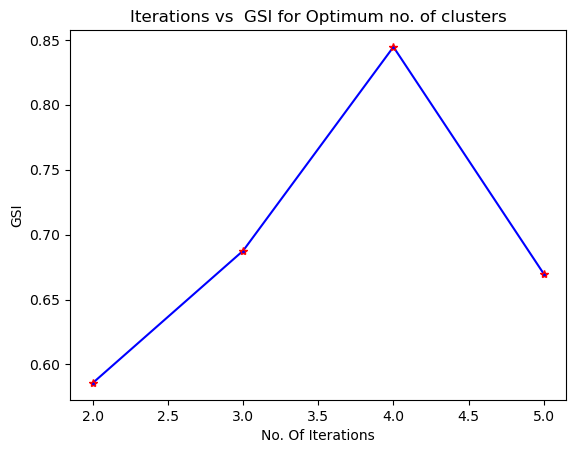

C:\Users\amans\AppData\Local\Temp\ipykernel_8200\2269541635.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  sumn[i] += polym[(int(nk-1))-j]*r[i]**(j)


GSI for IMC-1 is 0.8445626208747761
GSI for IMC-2 is 0.8445626208747761
GSI for SOC is 0.8445626208747761
PI IMC-1 is 0.04357103176354238
PI IMC-2 is 0.04344006534263622
PI SOC is 0.04357103176354238
SI IMC-1 is 0.04440056379359207
SI IMC-2 is 0.04396200647891447
SI SOC is 0.043277375866821906


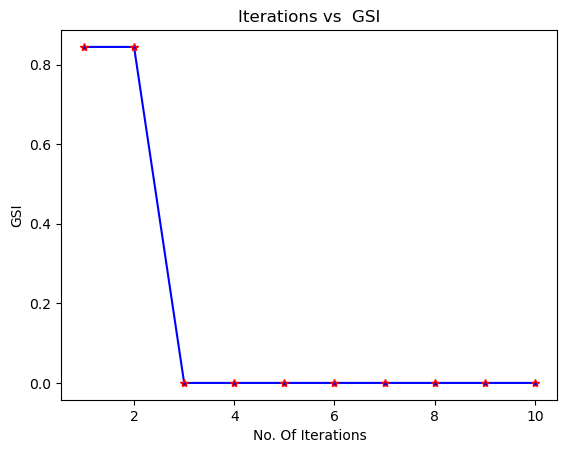

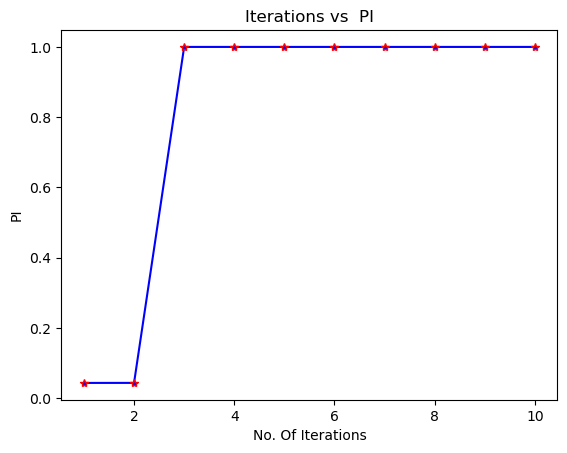

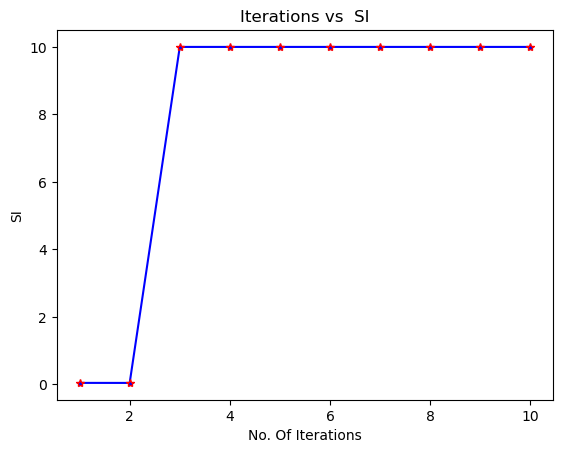

In [36]:
# Optimum no. of Clusters

nc = np.array((range(2,6)))
GSI = np.zeros((4))
j = 0
n,k = x2.shape

for i in nc:
    
    idx,m,cc_norm,delta,U = IMC1(x2,i)

    s = silhouette_index(x2,idx)

    S,GS = slht(s,idx,n,m,i)
    
    GSI[j] = GS
    
    j += 1

    
print(GSI)
gsimax = np.argmax((GSI))
print('optimum no of clusters are ', gsimax+2)
nk = gsimax+2
plt.plot(nc, GSI, marker='*', markeredgecolor = 'r', linestyle='-', color='b', label='Data Points')
plt.xlabel('No. Of Iterations')
plt.ylabel('GSI')
plt.title('Iterations vs  GSI for Optimum no. of clusters')
plt.show()

# Comparing IMC 1, IMC 2,SOC
idx1,m1,cc_norm1,delta1,U1 = IMC1(x2,nk)
idx2,m2,cc_norm2,delta2,U2 = IMC2(x2,nk)

s1 = silhouette_index(x2,idx1)
s2 = silhouette_index(x2,idx2)

S1,GS12 = slht(s1,idx1,n,m1,nk)
S2,GS22 = slht(s2,idx2,n,m2,nk)

mm1 = membership_matrix(U1, cc_norm1, fuzziness=2)
mm2 = membership_matrix(U2, cc_norm2, fuzziness=2)

pi12 = partition_index(U1, cc_norm1,mm1)
pi22 = partition_index(U2, cc_norm2,mm2)

si12=separation_index(U1, cc_norm1, mm1)
si22=separation_index(U2, cc_norm2, mm2)

GSS2,PIS2,SIS2,GSI2,PI2,SI2,Iteration2,c_disp2 = soc_complete(x2,nk)

print('GSI for IMC-1 is', GS12)
print('GSI for IMC-2 is',GS22)
print('GSI for SOC is',GSS2)
print('PI IMC-1 is',pi12)
print('PI IMC-2 is',pi22)
print('PI SOC is',PIS2)
print('SI IMC-1 is',si12)
print('SI IMC-2 is',si22)
print('SI SOC is',SIS2)

plt.plot(Iteration2, GSI2, marker='*', markeredgecolor = 'r', linestyle='-', color='b', label='Data Points')
plt.xlabel('No. Of Iterations')
plt.ylabel('GSI')
plt.title('Iterations vs  GSI')
plt.show()

plt.plot(Iteration2, PI2, marker='*',markeredgecolor = 'r', linestyle='-', color='b', label='Data Points')
plt.xlabel('No. Of Iterations')
plt.ylabel('PI')
plt.title('Iterations vs  PI')
plt.show()

plt.plot(Iteration2, SI2, marker='*',markeredgecolor = 'r', linestyle='-', color='b', label='Data Points')
plt.xlabel('No. Of Iterations')
plt.ylabel('SI')
plt.title('Iterations vs  SI')
plt.show()

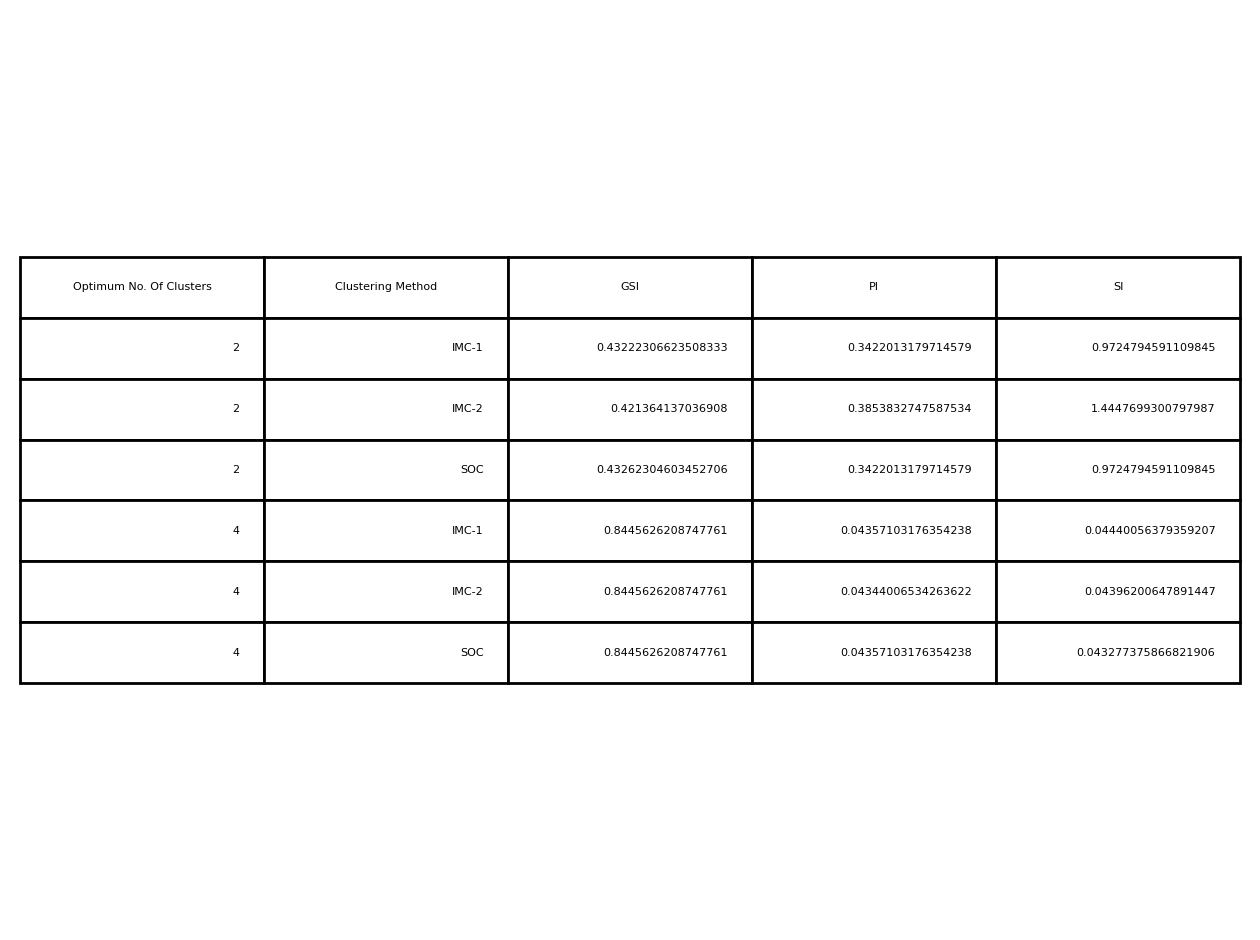

In [37]:
import pandas as pd

data = {
    'Optimum No. Of Clusters' : [2,2,2,4,4,4],
    'Clustering Method': ['IMC-1', 'IMC-2', 'SOC','IMC-1', 'IMC-2', 'SOC'],
    'GSI': [GS11, GS21, GSS1,GS12,GS22,GSS2],
    'PI': [pi11, pi21, PIS1,pi12, pi22, PIS2],
    'SI': [si11, si21, SIS1,si12, si22, SIS2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(dpi=200)
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
table.scale(1, 1.5)  # Scale the table size
table.set_fontsize(14)  # Set the font size
plt.tight_layout()  # Adjust the layout
plt.savefig('table_figure.pdf')  # Save as PDF for best quality
plt.show()

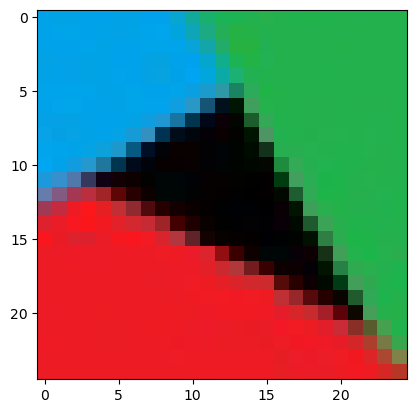

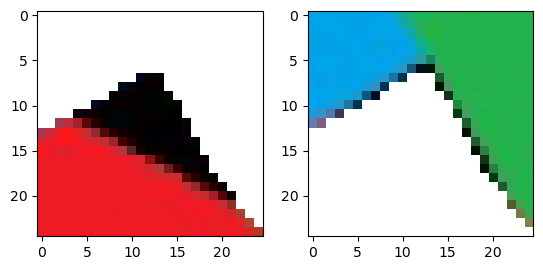

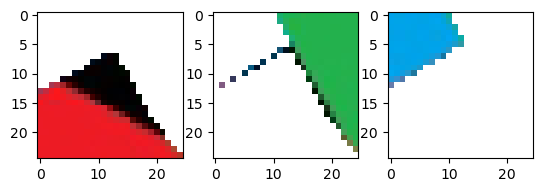

C:\Users\amans\AppData\Local\Temp\ipykernel_8200\2269541635.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  sumn[i] += polym[(int(nk-1))-j]*r[i]**(j)


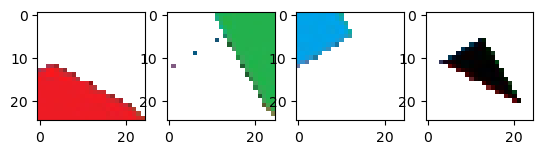

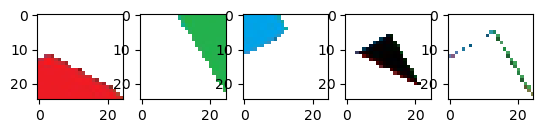

In [38]:
# plt.imshow(imgray2)
# aa,bb,cc = imgray2.shape

# for nk in range(2,6):
#     GSS,Pi,Si,GSI,PI,SI,Iteration,c_disp = soc_complete(x2,nk)
    
#     reshaped_data = np.zeros((aa,bb,cc,nk) , dtype = int)

#     for i in range(nk):
#         reshaped_data[:,:,:,i] = c_disp[:,:,i].reshape((aa,bb,-1))
    
#     fig, ax = plt.subplots(nrows=1, ncols=nk)
#     for i in range(nk):
#         ax[i].imshow(reshaped_data[:,:,:,i])
        
#     plt.show()

In [27]:
n_clusters = 4
x = x2
kmeans = KMeans(n_clusters,n_init = 'auto').fit(x)
y=kmeans.labels_
nk = n_clusters
n,k = x.shape
m = np.zeros((nk))

for i in range(nk):
    for j in range(n):
        if y[j]==i:
            m[i] += 1
            
print(m)
    
s1 = silhouette_index(x,y)
S1,GS13 = slht(s1,y,n,m,nk)

GS13

[204. 194. 111. 116.]


C:\Users\amans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.8445626208747762

In [25]:
x2.shape

(625, 3)

In [30]:
nk = optimum_clusters(x2)

[0.21713783 0.24944555 0.208699   0.27870979]
optimum no of clusters are  5
